In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

c:\Users\Elio Saade\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


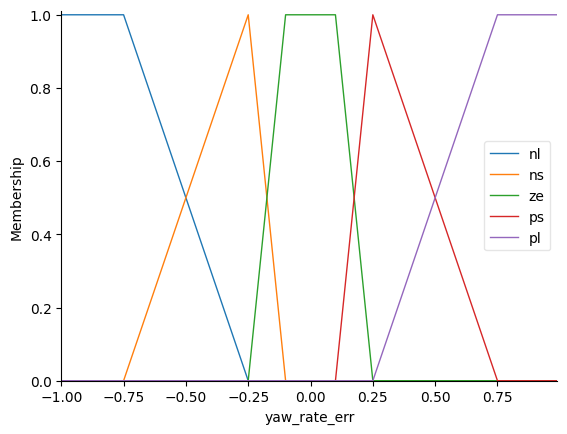

In [2]:
# Yaw Rate Error
yaw_rate_err =  ctrl.Antecedent(np.arange(-1, 1, 0.01), 'yaw_rate_err')   

yaw_rate_err['nl'] = fuzzy.trapmf(yaw_rate_err.universe, [-1, -1, -0.75, -0.25])
yaw_rate_err['ns'] = fuzzy.trimf(yaw_rate_err.universe, [-0.75, -0.25, -0.1])
yaw_rate_err['ze'] = fuzzy.trapmf(yaw_rate_err.universe, [-0.25, -0.1, 0.1, 0.25])
yaw_rate_err['ps'] = fuzzy.trimf(yaw_rate_err.universe, [0.1, 0.25, 0.75])
yaw_rate_err['pl'] = fuzzy.trapmf(yaw_rate_err.universe, [0.25, 0.75, 1, 1])

# yaw_rate_err['nl'] = fuzzy.trapmf(yaw_rate_err.universe, [-1, -1, -0.9, -0.5])
# yaw_rate_err['ns'] = fuzzy.trimf(yaw_rate_err.universe, [-0.9, -0.5, 0])
# yaw_rate_err['ze'] = fuzzy.trimf(yaw_rate_err.universe, [-0.5, 0, 0.5])
# yaw_rate_err['ps'] = fuzzy.trimf(yaw_rate_err.universe, [0, 0.5, 0.9])
# yaw_rate_err['pl'] = fuzzy.trapmf(yaw_rate_err.universe, [0.5, 0.9, 1, 1])

yaw_rate_err.view()

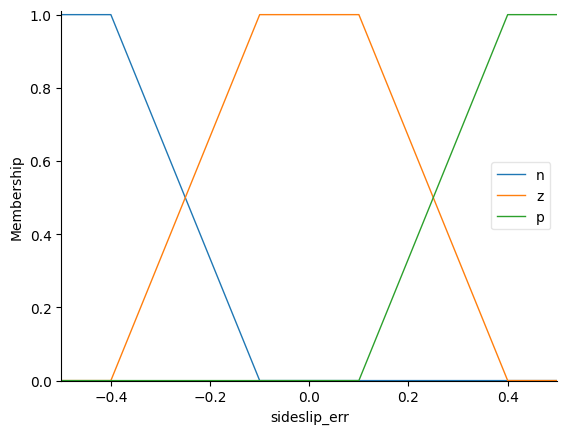

In [4]:
# Yaw Rate Error Derivative
sideslip_err = ctrl.Antecedent(np.arange(-0.5, 0.51, 0.1), 'sideslip_err')

sideslip_err['n'] = fuzzy.trapmf(sideslip_err.universe, [-0.5, -0.5, -0.4, -0.1])
sideslip_err['z'] = fuzzy.trapmf(sideslip_err.universe, [-0.4, -0.1, 0.1, 0.4])
sideslip_err['p'] = fuzzy.trapmf(sideslip_err.universe, [0.1, 0.4, 0.5, 0.5])

sideslip_err.view()

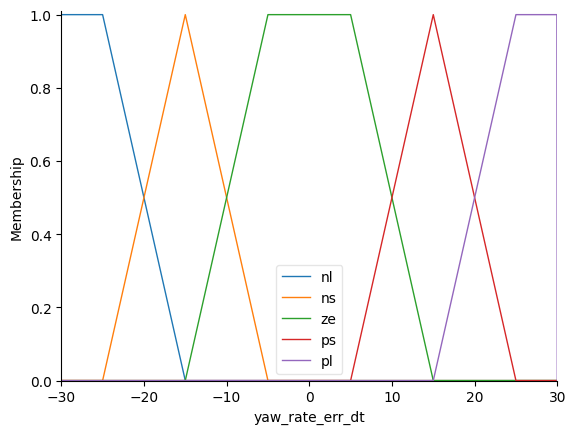

In [3]:
# Sideslip Angle Error
yaw_rate_err_dt = ctrl.Antecedent(np.arange(-30, 30.05, 0.05), 'yaw_rate_err_dt')

yaw_rate_err_dt['nl'] = fuzzy.trapmf(yaw_rate_err_dt.universe, [-30, -30, -25, -15])
yaw_rate_err_dt['ns'] = fuzzy.trimf(yaw_rate_err_dt.universe, [-25, -15, -5])
yaw_rate_err_dt['ze'] = fuzzy.trapmf(yaw_rate_err_dt.universe, [-15, -5, 5, 15])
yaw_rate_err_dt['ps'] = fuzzy.trimf(yaw_rate_err_dt.universe, [5, 15, 25])
yaw_rate_err_dt['pl'] = fuzzy.trapmf(yaw_rate_err_dt.universe, [15, 25, 30, 30])

yaw_rate_err_dt.view()

c:\Users\Elio Saade\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


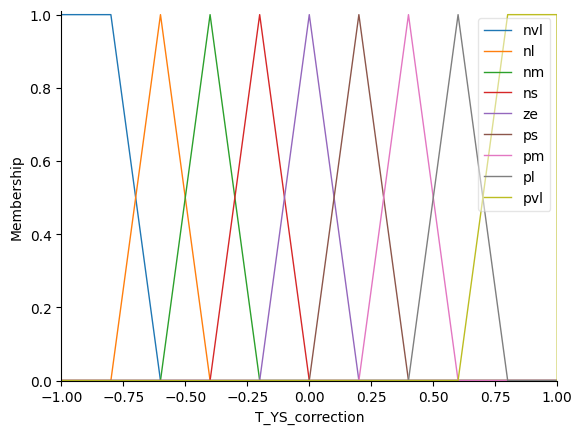

In [3]:
T_YS_correction = ctrl.Consequent(np.arange(-1, 1.001, 0.001), 'T_YS_correction')

T_YS_correction['nvl'] = fuzzy.trapmf(T_YS_correction.universe, [-1, -1, -0.8, -0.6])
T_YS_correction['nl'] = fuzzy.trimf(T_YS_correction.universe, [-0.8, -0.6, -0.4])
T_YS_correction['nm'] = fuzzy.trimf(T_YS_correction.universe, [-0.6, -0.4, -0.2])
T_YS_correction['ns'] = fuzzy.trimf(T_YS_correction.universe, [-0.4, -0.2, 0])
T_YS_correction['ze'] = fuzzy.trimf(T_YS_correction.universe, [-0.2, 0, 0.2])
T_YS_correction['ps'] = fuzzy.trimf(T_YS_correction.universe, [0, 0.2, 0.4])
T_YS_correction['pm'] = fuzzy.trimf(T_YS_correction.universe, [0.2, 0.4, 0.6])
T_YS_correction['pl'] = fuzzy.trimf(T_YS_correction.universe, [0.4, 0.6, 0.8])
T_YS_correction['pvl'] = fuzzy.trapmf(T_YS_correction.universe, [0.6, 0.8, 1, 1])

T_YS_correction.view()

In [39]:
# Sideslip Angle Error is Negative
rule1 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['nl'] & sideslip_err['n'], T_YS_correction['nvl'])
rule2 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ns'] & sideslip_err['n'], T_YS_correction['nl'])
rule3 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ze'] & sideslip_err['n'], T_YS_correction['nm'])
rule4 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ps'] & sideslip_err['n'], T_YS_correction['ns'])
rule5 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['pl'] & sideslip_err['n'], T_YS_correction['ze'])

rule6 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['nl'] & sideslip_err['n'], T_YS_correction['nl'])
rule7 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ns'] & sideslip_err['n'], T_YS_correction['nm'])
rule8 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ze'] & sideslip_err['n'], T_YS_correction['ns'])
rule9 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ps'] & sideslip_err['n'], T_YS_correction['ze'])
rule10 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['pl'] & sideslip_err['n'], T_YS_correction['ps'])

rule11 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['nl'] & sideslip_err['n'], T_YS_correction['nm'])
rule12 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ns'] & sideslip_err['n'], T_YS_correction['ns'])
rule13 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ze'] & sideslip_err['n'], T_YS_correction['ze'])
rule14 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ps'] & sideslip_err['n'], T_YS_correction['ps'])
rule15 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['pl'] & sideslip_err['n'], T_YS_correction['pm'])

rule16 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['nl'] & sideslip_err['n'], T_YS_correction['ns'])
rule17 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ns'] & sideslip_err['n'], T_YS_correction['ze'])
rule18 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ze'] & sideslip_err['n'], T_YS_correction['ps'])
rule19 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ps'] & sideslip_err['n'], T_YS_correction['pm'])
rule20 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['pl'] & sideslip_err['n'], T_YS_correction['pl'])

rule21 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['nl'] & sideslip_err['n'], T_YS_correction['ze'])
rule22 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ns'] & sideslip_err['n'], T_YS_correction['ps'])
rule23 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ze'] & sideslip_err['n'], T_YS_correction['pm'])
rule24 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ps'] & sideslip_err['n'], T_YS_correction['pl'])
rule25 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['pl'] & sideslip_err['n'], T_YS_correction['pvl'])

# Sideslip Angle Error is Zero
rule26 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['nl'] & sideslip_err['z'], T_YS_correction['nvl'])
rule27 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ns'] & sideslip_err['z'], T_YS_correction['nl'])
rule28 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ze'] & sideslip_err['z'], T_YS_correction['nm'])
rule29 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ps'] & sideslip_err['z'], T_YS_correction['ns'])
rule30 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['pl'] & sideslip_err['z'], T_YS_correction['ze'])

rule31 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['nl'] & sideslip_err['z'], T_YS_correction['nl'])
rule32 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ns'] & sideslip_err['z'], T_YS_correction['nm'])
rule33 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ze'] & sideslip_err['z'], T_YS_correction['ns'])
rule34 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ps'] & sideslip_err['z'], T_YS_correction['ze'])
rule35 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['pl'] & sideslip_err['z'], T_YS_correction['ps'])

rule36 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['nl'] & sideslip_err['z'], T_YS_correction['nm'])
rule37 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ns'] & sideslip_err['z'], T_YS_correction['ns'])
rule38 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ze'] & sideslip_err['z'], T_YS_correction['ze'])
rule39 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ps'] & sideslip_err['z'], T_YS_correction['ps'])
rule40 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['pl'] & sideslip_err['z'], T_YS_correction['pm'])

rule41 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['nl'] & sideslip_err['z'], T_YS_correction['ns'])
rule42 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ns'] & sideslip_err['z'], T_YS_correction['ze'])
rule43 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ze'] & sideslip_err['z'], T_YS_correction['ps'])
rule44 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ps'] & sideslip_err['z'], T_YS_correction['pm'])
rule45 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['pl'] & sideslip_err['z'], T_YS_correction['pl'])

rule46 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['nl'] & sideslip_err['z'], T_YS_correction['ze'])
rule47 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ns'] & sideslip_err['z'], T_YS_correction['ps'])
rule48 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ze'] & sideslip_err['z'], T_YS_correction['pm'])
rule49 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ps'] & sideslip_err['z'], T_YS_correction['pl'])
rule50 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['pl'] & sideslip_err['z'], T_YS_correction['pvl'])

# Sideslip Angle Error is Positive
rule51 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['nl'] & sideslip_err['p'], T_YS_correction['nvl'])
rule52 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ns'] & sideslip_err['p'], T_YS_correction['nl'])
rule53 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ze'] & sideslip_err['p'], T_YS_correction['nm'])
rule54 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['ps'] & sideslip_err['p'], T_YS_correction['ns'])
rule55 = ctrl.Rule(yaw_rate_err['nl'] & yaw_rate_err_dt['pl'] & sideslip_err['p'], T_YS_correction['ze'])

rule56 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['nl'] & sideslip_err['p'], T_YS_correction['nl'])
rule57 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ns'] & sideslip_err['p'], T_YS_correction['nm'])
rule58 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ze'] & sideslip_err['p'], T_YS_correction['ns'])
rule59 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['ps'] & sideslip_err['p'], T_YS_correction['ze'])
rule60 = ctrl.Rule(yaw_rate_err['ns'] & yaw_rate_err_dt['pl'] & sideslip_err['p'], T_YS_correction['ps'])

rule61 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['nl'] & sideslip_err['p'], T_YS_correction['nm'])
rule62 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ns'] & sideslip_err['p'], T_YS_correction['ns'])
rule63 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ze'] & sideslip_err['p'], T_YS_correction['ze'])
rule64 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['ps'] & sideslip_err['p'], T_YS_correction['ps'])
rule65 = ctrl.Rule(yaw_rate_err['ze'] & yaw_rate_err_dt['pl'] & sideslip_err['p'], T_YS_correction['pm'])

rule66 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['nl'] & sideslip_err['p'], T_YS_correction['ns'])
rule67 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ns'] & sideslip_err['p'], T_YS_correction['ze'])
rule68 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ze'] & sideslip_err['p'], T_YS_correction['ps'])
rule69 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['ps'] & sideslip_err['p'], T_YS_correction['pm'])
rule70 = ctrl.Rule(yaw_rate_err['ps'] & yaw_rate_err_dt['pl'] & sideslip_err['p'], T_YS_correction['pl'])

rule71 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['nl'] & sideslip_err['p'], T_YS_correction['ze'])
rule72 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ns'] & sideslip_err['p'], T_YS_correction['ps'])
rule73 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ze'] & sideslip_err['p'], T_YS_correction['pm'])
rule74 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['ps'] & sideslip_err['p'], T_YS_correction['pl'])
rule75 = ctrl.Rule(yaw_rate_err['pl'] & yaw_rate_err_dt['pl'] & sideslip_err['p'], T_YS_correction['pvl'])

In [40]:
YS_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                            rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
                            rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
                            rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40,
                            rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50,
                            rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60,
                            rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70,
                            rule71, rule72, rule73, rule74, rule75])

YS_controller = ctrl.ControlSystemSimulation(YS_system)

0.009739578544996923


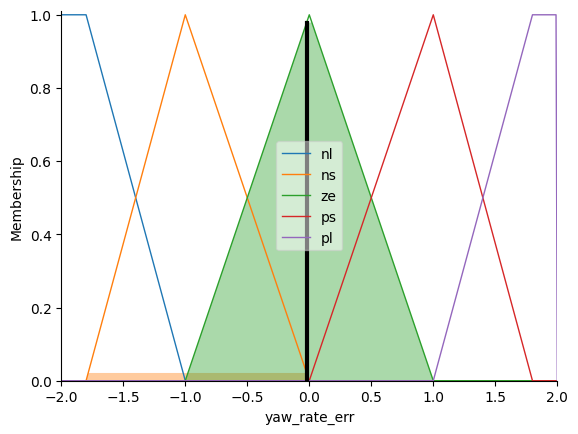

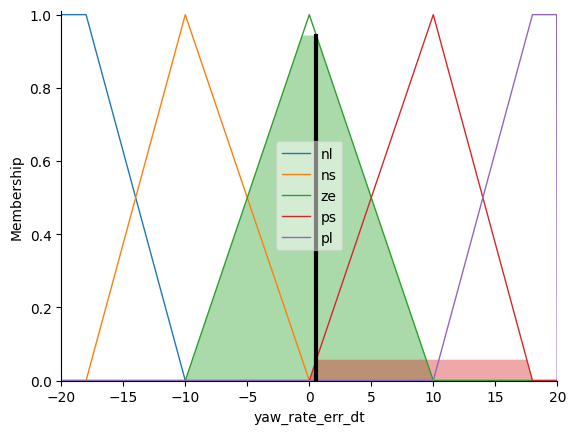

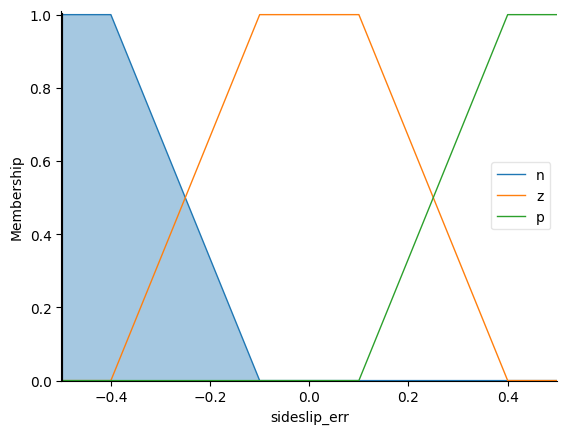

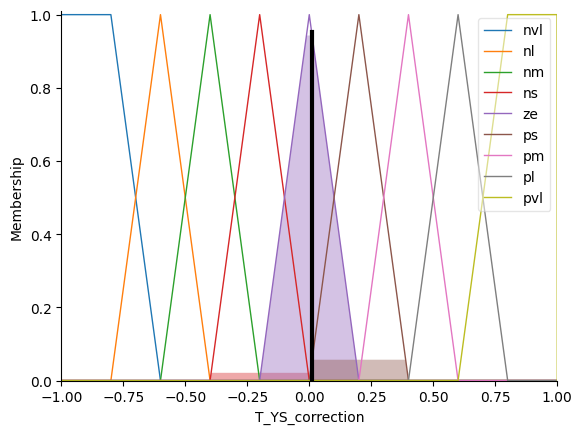

In [41]:
YS_controller.input['yaw_rate_err'] = -0.021215360220574443
YS_controller.input['yaw_rate_err_dt'] = 0.5705054099968455
YS_controller.input['sideslip_err'] = -0.6873815319262825

YS_controller.compute()
# Controller Output
yaw_correction = YS_controller.output['T_YS_correction']
print(yaw_correction)

yaw_rate_err.view(sim= YS_controller)
yaw_rate_err_dt.view(sim= YS_controller)
sideslip_err.view(sim= YS_controller)
T_YS_correction.view(sim= YS_controller)